<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Early_Glaucoma_Detection_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
import numpy as np


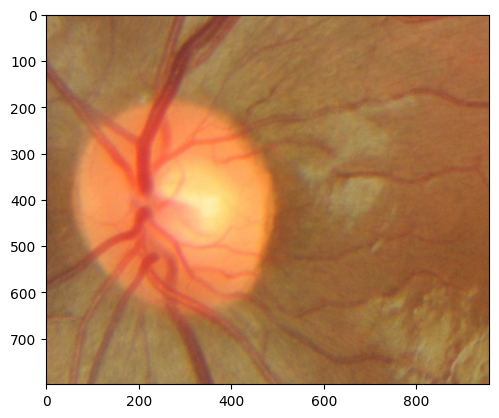

In [ ]:
img = image.load_img("/content/drive/MyDrive/Optic disc photos/normal_discs/Label 1.JPG")
plt.imshow(img)


In [ ]:
cv2.imread("/content/drive/MyDrive/Optic disc photos/normal_discs/Label 1.JPG").shape


(799, 958, 3)

In [ ]:

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:

train_dataset = train.flow_from_directory("/content/drive/MyDrive/Optic disc photos",
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Optic disc photos",
                                           target_size =(200,200),
                                            batch_size=3,
                                            class_mode = 'binary')



Found 88 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices
{'normal_discs':0, 'possibly_glaucomatous':1}


{'normal_discs': 0, 'possibly_glaucomatous': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape= (200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),

                                  tf.keras.layers.Dense(512, activation ='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])


In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=19,
                      validation_data=validation_dataset)

Epoch 1/19
5/5 [==============================] - 5s 1s/step - loss: 0.7251 - accuracy: 0.8000 - val_loss: 0.4116 - val_accuracy: 0.8523
Epoch 2/19
5/5 [==============================] - 5s 1s/step - loss: 0.3621 - accuracy: 0.8462 - val_loss: 0.6037 - val_accuracy: 0.6477
Epoch 3/19
5/5 [==============================] - 8s 2s/step - loss: 0.5112 - accuracy: 0.8000 - val_loss: 0.4878 - val_accuracy: 0.8068
Epoch 4/19
5/5 [==============================] - 5s 1s/step - loss: 0.5946 - accuracy: 0.5333 - val_loss: 0.4852 - val_accuracy: 0.7273
Epoch 5/19
5/5 [==============================] - 6s 1s/step - loss: 0.8436 - accuracy: 0.6000 - val_loss: 0.4367 - val_accuracy: 0.8295
Epoch 6/19
5/5 [==============================] - 5s 1s/step - loss: 0.5263 - accuracy: 0.6667 - val_loss: 0.4186 - val_accuracy: 0.8295
Epoch 7/19
5/5 [==============================] - 4s 946ms/step - loss: 0.5745 - accuracy: 0.6000 - val_loss: 0.4025 - val_accuracy: 0.8295
Epoch 8/19
5/5 [======================

1/1 [==============================] - 0s 43ms/step


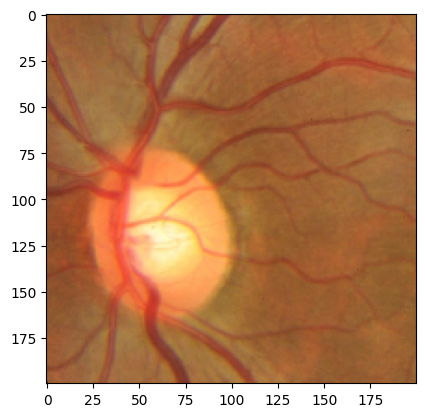

In [ ]:
dir_path = '/content/drive/MyDrive/Optic disc photos//possibly_glaucomatous'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size = (200,200))
    plt.imshow(img)
    plt.show

x=image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
  print=("normal_disc")
else:
  print=("possibly_glaucomatous")


In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
val = model.predict(images)
if val == 0:
  print = ("normal_disc")
else:
  print = ("possibly_glaucomatous")


1/1 [==============================] - 0s 51ms/step
